# Customer Segmentation with K-Means

## Overview
This project performs **customer segmentation** using the **K-Means clustering algorithm**, a widely used unsupervised learning technique in marketing analytics.

Customers are grouped based on **Age**, **Annual Income**, and **Spending Score** to uncover meaningful patterns in purchasing behavior. The resulting segments can be used for **audience targeting, persona development, and strategic marketing decision-making**.

---

## Data Source
- **customers.csv**
  - Contains customer demographic and spending-related features
  - Commonly used dataset for introductory and applied customer segmentation tasks

---

## Workflow 
1. Load and explore the customer dataset  
2. Inspect feature distributions and relationships  
3. Scale numerical features using `StandardScaler`  
4. Apply the **Elbow Method** to determine the optimal number of clusters (K)  
5. Train the **K-Means clustering model**  
6. Assign cluster labels to each customer  
7. Visualize customer segments to interpret behavioral patterns  
8. Export the clustered dataset for further analysis 


In [1]:
# Import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import IPython.display as HTML
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
# Load dataset
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Age,Annual_Income,Spending_Score
0,1,22,30000,40
1,2,25,35000,45
2,3,27,38000,48
3,4,31,45000,60
4,5,35,52000,65


In [4]:
# Select numerical features
features = ["Age", "Annual_Income", "Spending_Score"]
X = df[features]

In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine optimal clusters using the elbow method
inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

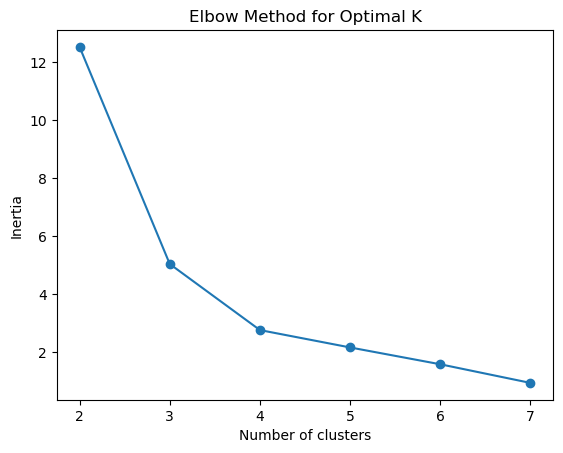

In [13]:
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [14]:
# Fit K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [16]:
df.head(10)

,CustomerID,Age,Annual_Income,Spending_Score,Cluster
0,1,22,30000,40,1
1,2,25,35000,45,1
2,3,27,38000,48,1
3,4,31,45000,60,2
4,5,35,52000,65,2
5,6,40,60000,70,0
6,7,45,68000,72,3
7,8,50,75000,80,3
8,9,21,32000,38,1
9,10,29,42000,62,2


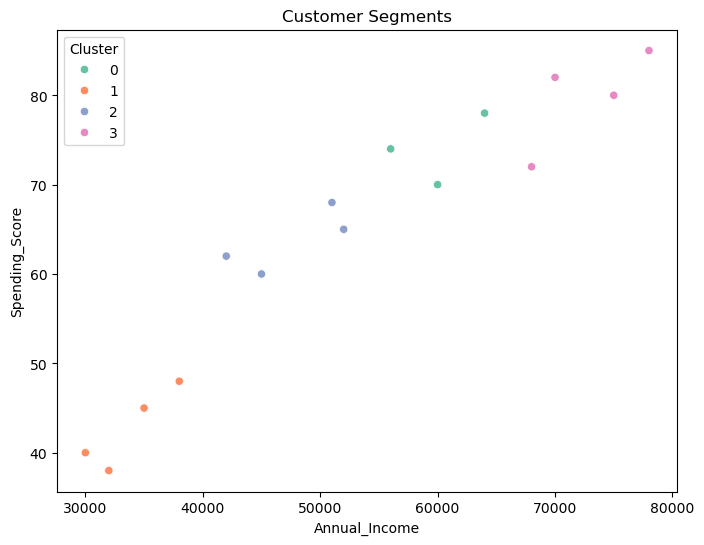

In [17]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score",
                hue="Cluster", palette="Set2")
plt.title("Customer Segments")
plt.show()


In [18]:
# Save segmented dataset
df.to_csv("customers_segmented_output.csv", index=False)

## Future Enhancements
- Integrate additional features such as: Website activity, Purchase history, Customer lifetime value (CLV)
- Experiment with advanced clustering techniques: DBSCAN, Gaussian Mixture Models, Hierarchical clustering
- Evaluate cluster stability and quality using silhouette scores
- Deploy segmentation results via an API or interactive dashboard
- Enable real-time customer scoring for marketing teams